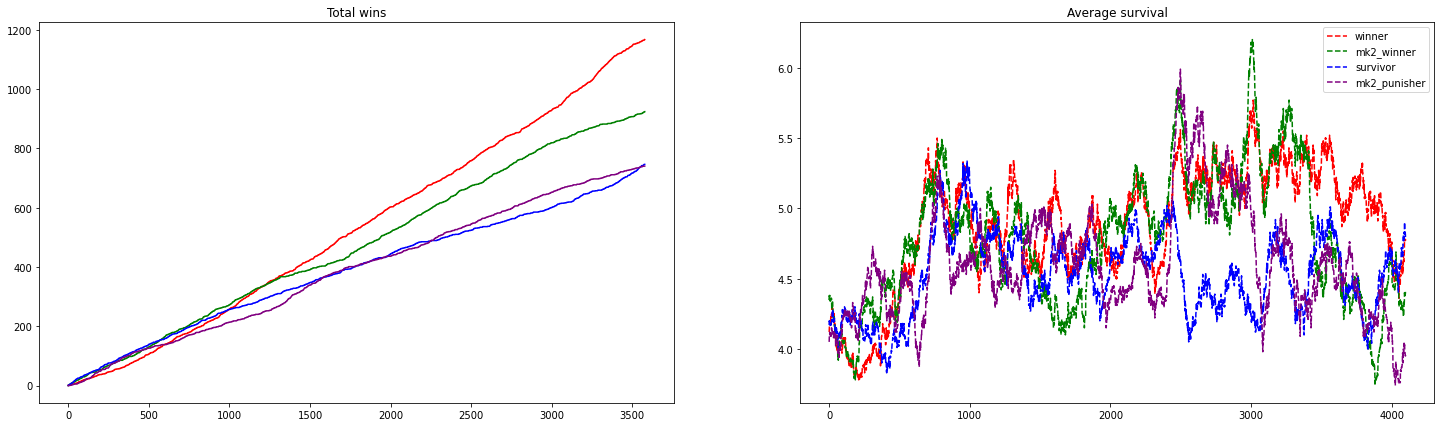

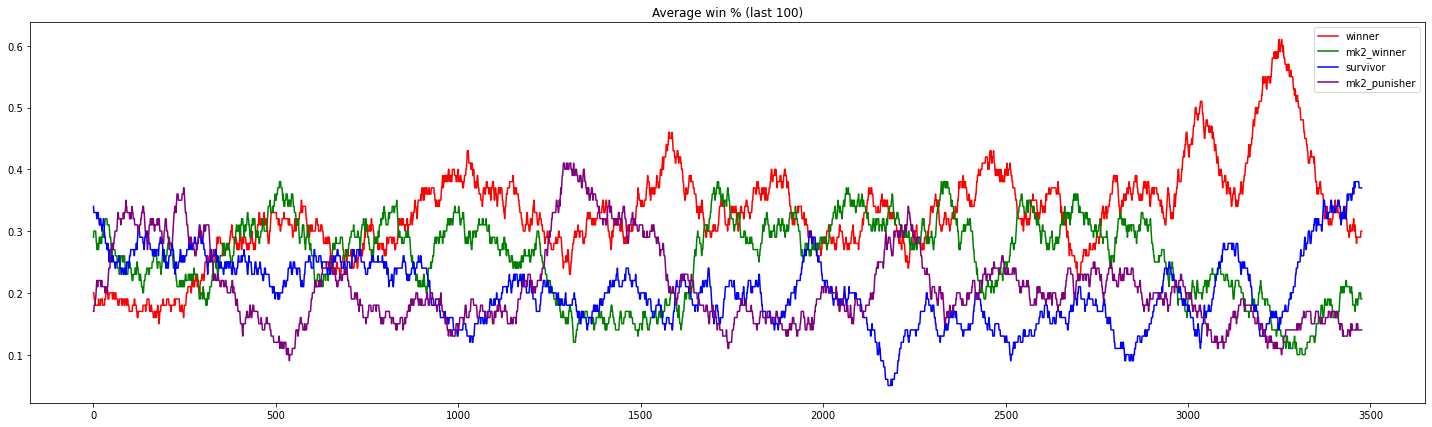

In [32]:
import json
import matplotlib.pyplot as plt
import pandas as pd

snakes = ["winner", "mk2_winner", "survivor", "mk2_punisher"]
colors = ["red", "green", "blue", "purple"]

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(25, 7))
history_dict = dict()
avg_win_dict = dict()
survival_dict = dict()
avg_over = 300
for snake_no, snake in enumerate(snakes):
    snake_history = list()

    with open(f"./models/{snake}-history.json") as json_file:
        snake_history_json = json.load(json_file)
        snake_history = [*snake_history, *snake_history_json]
        accumulated_history = list()
        avg_win_history = list()
        for index in range(0, len(snake_history)):
            accumulated_history.append(sum(snake_history[0:index]))
            if index > avg_over:
                avg_win_history.append(sum(snake_history[index-avg_over:index]) / avg_over)
        history_dict[snake] = accumulated_history
        avg_win_dict[snake] = avg_win_history

    survival_history = list()
    with open(f"./models/{snake}-surival-history.json") as json_file:
        survival_history_json = json.load(json_file)
        survival_history = [*survival_history, *survival_history_json]
        avg_history = list()
        for end in range(avg_over, len(survival_history)):
            avg_history.append(sum(survival_history[end-avg_over:end]) / avg_over)
        survival_dict[snake] = avg_history

    axs1.title.set_text("Total wins")
    axs2.title.set_text("Average survival")
    axs1.plot(history_dict[snake], label=snake, color=colors[snake_no])
    axs2.plot(survival_dict[snake], label=snake, linestyle="dashed", color=colors[snake_no])

plt.legend()
plt.show()

plt.figure(figsize=(25, 7))
plt.title("Average win % (last 100)")
for snake_no, snake in enumerate(snakes):
    plt.plot(avg_win_dict[snake], label=snake, color=colors[snake_no])
plt.legend()
plt.show()
